# TP 4.  Iris data set. Support Vector Machines

## Plan :

   [- Description du dataset](#1)
   
   [- SVM](#2)
      
   [- Hyperparameter optimization](#3)
   
   [- Travail à réaliser](#4)

In [8]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns

In [9]:
#iris = datasets.load_iris()

iris = pd.read_csv('iris.csv')
print(type(iris))
iris.head()

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<img src="http://media.giphy.com/media/ASd0Ukj0y3qMM/giphy.gif" width = 300>
<a id="1"></a> 
 
# 1. Description du dataset


In [10]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


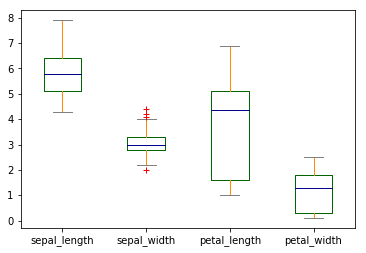

In [11]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
iris.plot.box(color=color, sym='r+');

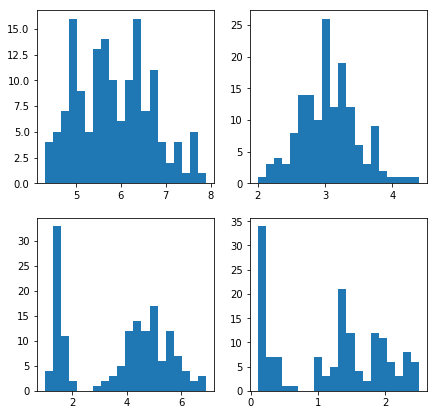

In [12]:
fig = plt.figure(figsize=(7,7))
for k in range(0,4):
    fig.add_subplot(2,2,k+1)
    plt.hist(iris.iloc[:,k], bins = 20);

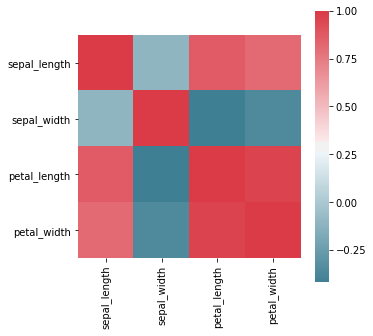

In [13]:
f, ax = plt.subplots(figsize=(5,5))
corr = iris.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);

<img src="http://media0.giphy.com/media/3BRDkVjKikYW4/giphy.gif" width = 300>
<a id="2"></a> 
 
# 2. SVM

In [14]:
from sklearn import svm

Fonctions "créer une grille" et "prédiction sur la grille"

In [15]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifies
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [16]:
#iris = datasets.load_iris()
#type(iris.data[:, :2])

In [17]:
iris_X = np.asarray(iris.iloc[:,0:2])
#iris_X = np.asarray(iris.iloc[:,2:4])
iris_Y0 = np.asarray(iris.iloc[:,4])
iris_Y = (iris_Y0 == "versicolor")*1 + (iris_Y0 == "virginica")*2
iris_Y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

/home/vrunge/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


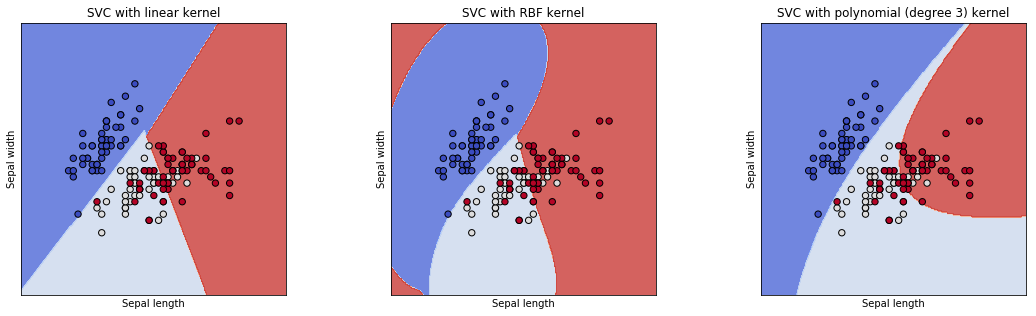

In [18]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(iris_X, iris_Y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 3,figsize=(18,5))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = iris_X[:, 0], iris_X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=iris_Y, cmap=plt.cm.coolwarm, s=40, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show();


Calcul du score

In [19]:
models = (svm.SVC(kernel='linear', C=1),
          svm.SVC(kernel='rbf', gamma=0.7, C=1),
          svm.SVC(kernel='poly', degree=3, C=1))

In [20]:
models = (clf.fit(iris_X, iris_Y) for clf in models)
u = []
for clf in models:
    u = u + [(clf.predict(iris_X)==iris_Y).sum()/(1.0*iris_Y.shape[0])]
    
print(u)

[0.82, 0.8266666666666667, 0.8133333333333334]


In [21]:
models = (clf.fit(iris_X, iris_Y) for clf in models)
v = []
for clf in models:
    v = v + [clf.score(iris_X,iris_Y)]
    
print(u)

[0.82, 0.8266666666666667, 0.8133333333333334]


Remarque: le résultat est le même. 

<img src="http://media3.giphy.com/media/eNTxLwTGW7E64/giphy.gif" width = 300>
<a id="3"></a> 
 
# 3. Hyperparameter optimization

http://scikit-learn.org/stable/modules/cross_validation.html

In [22]:
from sklearn.model_selection import cross_val_score
l = []
for i in range(0,20):
    clf = svm.SVC(kernel='rbf', gamma = 0.8, C=(2-0.01)*i/19+0.01)
    scores = cross_val_score(clf, iris_X, iris_Y, cv=3)
    l = l + [scores.mean()]
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), (20-0.1)*i/19+0.1)

('Accuracy: 0.7998 (+/- 0.10)', 0.1)
('Accuracy: 0.8199 (+/- 0.06)', 1.1473684210526316)
('Accuracy: 0.8268 (+/- 0.06)', 2.194736842105263)
('Accuracy: 0.8203 (+/- 0.05)', 3.2421052631578946)
('Accuracy: 0.8133 (+/- 0.05)', 4.289473684210526)
('Accuracy: 0.8129 (+/- 0.07)', 5.336842105263157)
('Accuracy: 0.8064 (+/- 0.05)', 6.384210526315789)
('Accuracy: 0.8002 (+/- 0.02)', 7.43157894736842)
('Accuracy: 0.8002 (+/- 0.02)', 8.478947368421052)
('Accuracy: 0.8072 (+/- 0.04)', 9.526315789473683)
('Accuracy: 0.8072 (+/- 0.04)', 10.573684210526315)
('Accuracy: 0.8072 (+/- 0.04)', 11.621052631578946)
('Accuracy: 0.8072 (+/- 0.04)', 12.668421052631578)
('Accuracy: 0.8072 (+/- 0.04)', 13.71578947368421)
('Accuracy: 0.8072 (+/- 0.04)', 14.76315789473684)
('Accuracy: 0.8072 (+/- 0.04)', 15.810526315789474)
('Accuracy: 0.8072 (+/- 0.04)', 16.857894736842105)
('Accuracy: 0.8072 (+/- 0.04)', 17.905263157894737)
('Accuracy: 0.8072 (+/- 0.04)', 18.95263157894737)
('Accuracy: 0.8007 (+/- 0.05)', 20.0)


2

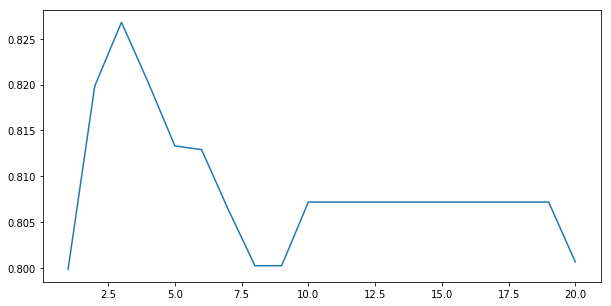

In [23]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(1,20,20), l)
np.argmax(l)

<img src="https://media.giphy.com/media/Y9zvpD9uHA1Tq/giphy.gif" width = 300>
<a id="4"></a> 
 
# 4. Travail à réaliser

1) Tester différentes fonctions de SVM et différents kernel: LinearSVC, SVC, SGDClassifier... *

Traiter la question du séparateur 1 classe contre 1 classe ou 1 classe contre toutes.